# Clustering con python

## importar data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

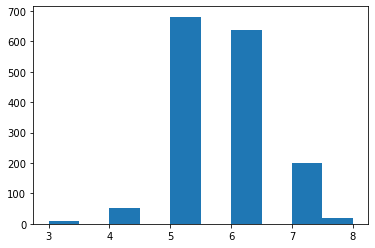

In [3]:
plt.hist(df["quality"])

In [4]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalizar datos

In [5]:
df_norm = (df-df.min()) / (df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico scikit-learn

In [6]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
clus = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [18]:
md_h = pd.Series(clus.labels_)

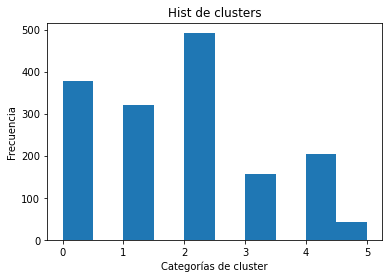

In [19]:
plt.hist(md_h)
plt.title("Hist de clusters")
plt.xlabel("Categorías de cluster")
plt.ylabel("Frecuencia")
plt.show()

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [11]:
Z = linkage(df_norm, "ward")

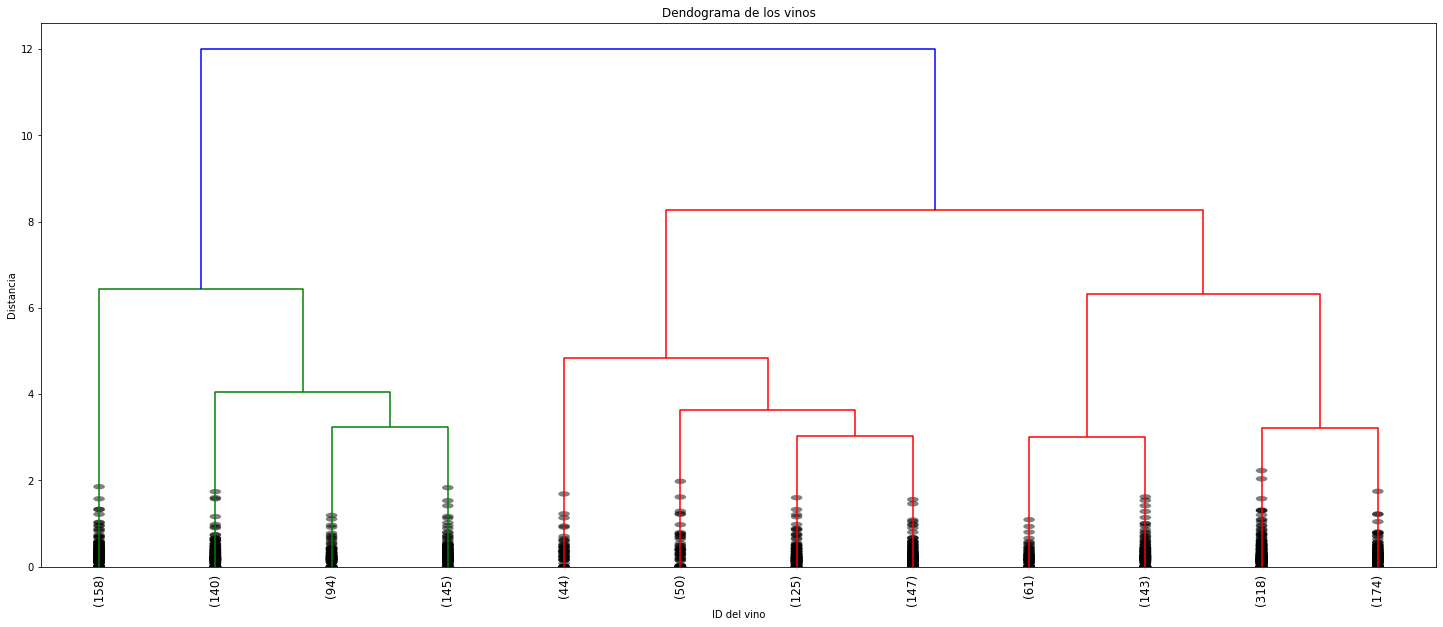

In [14]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, 
           leaf_rotation=90, 
           leaf_font_size=12., 
           color_threshold=0.7*12,
           truncate_mode="lastp", 
           p=12,
           show_leaf_counts=True,
           show_contracted=True)
plt.show()

In [15]:
from sklearn.cluster import KMeans
from sklearn import datasets

C:\Users\pablo\anaconda3\envs\dl_env\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict


In [16]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
model.labels_

array([2, 2, 2, ..., 0, 2, 3])

In [20]:
md_k = pd.Series(model.labels_)

In [26]:
df["clus_h"]=md_h
df["clus_k"]=md_k

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h,clus_k
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,2


### La suma de los cuadrados del kmeans (sin normalizar)
$$ SSW = \sum_{j=1}^k \sum_{x_i \in C_j} (x_i - c_j)  $$
donde,
* $C_j$ : El cluster j.
* $c_j$ : El centroide del cluster j.
* $x_i$ : instancia $i^{th}$

In [23]:
model.inertia_

188.54082027051155

# Interpretacion final

* Colocar precios similares a productos similares, y precios diferentes para productos diferentes.

In [30]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h,clus_k
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.761101,2.506567
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,1.396568,1.616885
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.000000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,3.000000,4.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,5.000000,5.000000


In [28]:
df.groupby("clus_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_h
clus_k,,,,,,,,,,,,,
0,6.583333,0.583704,0.096343,2.268056,0.069167,18.587963,41.125000,0.994424,3.472870,0.643009,11.638580,6.087963,3.412037
1,8.203383,0.523083,0.308722,3.298872,0.088850,30.095865,94.556391,0.997435,3.285602,0.650301,9.834461,5.278195,1.056391
2,7.293575,0.682137,0.067067,2.261872,0.084388,12.649441,35.913408,0.996607,3.402849,0.584916,9.939758,5.131285,2.134078
3,8.793220,0.346631,0.432797,2.452119,0.075089,12.771186,29.762712,0.995602,3.263220,0.730678,11.663136,6.572034,0.080508
4,8.315488,0.528889,0.274141,2.186869,0.091185,10.946128,42.831650,0.997171,3.273131,0.633636,9.746633,5.404040,1.531987
5,11.252212,0.423341,0.543319,2.894690,0.116243,11.371681,33.915929,0.999016,3.141150,0.754336,10.313127,5.752212,2.477876


In [29]:
df.groupby("clus_h").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clus_k
clus_h,,,,,,,,,,,,,
0,8.903694,0.370158,0.422691,2.501055,0.077847,13.697889,33.836412,0.996212,3.269842,0.707757,11.258839,6.266491,3.184697
1,8.115528,0.532593,0.299255,3.231366,0.087519,25.844720,86.099379,0.997501,3.301211,0.620714,9.721946,5.254658,1.736025
2,7.601423,0.640803,0.113557,2.231707,0.086341,11.498984,35.735772,0.996698,3.356118,0.590528,9.886450,5.276423,2.481707
3,11.882278,0.421456,0.548734,2.777215,0.086614,11.101266,33.772152,0.999397,3.122848,0.707785,10.328903,5.797468,4.917722
4,6.513235,0.623015,0.080000,2.205147,0.069343,19.000000,40.568627,0.994559,3.488578,0.634216,11.539134,5.892157,0.323529
5,8.395455,0.528182,0.405455,1.920455,0.269614,13.250000,58.181818,0.997001,3.089091,1.193636,9.515909,5.250000,4.045455


In [31]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'clus_h', 'clus_k'],
      dtype='object')

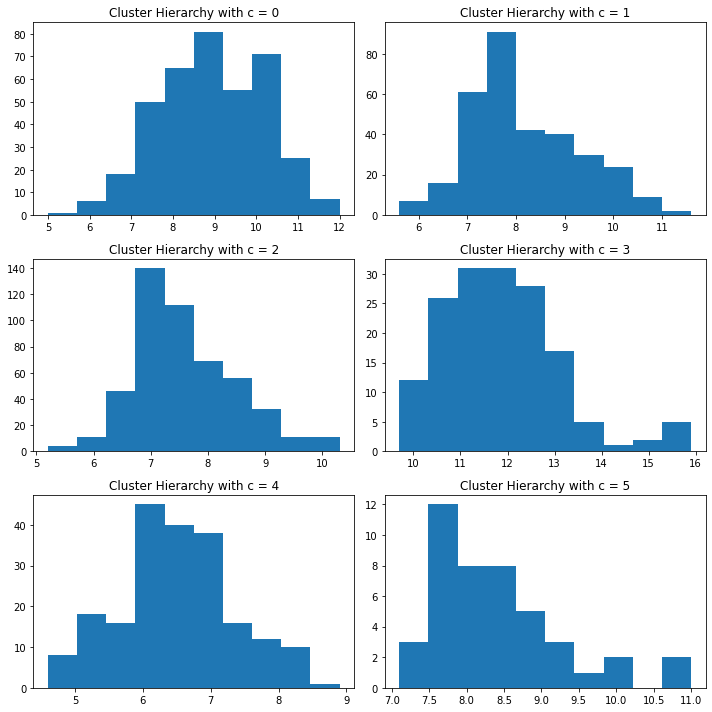

In [37]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
acum=0
for i in range(3):
    axs[i,0].hist(df.loc[df["clus_h"]==acum,"fixed acidity"])
    axs[i,0].set_title("Cluster Hierarchy with c = {}".format(acum))
    acum+=1
    axs[i,1].hist(df.loc[df["clus_h"]==acum,"fixed acidity"])
    axs[i,1].set_title("Cluster Hierarchy with c = {}".format(acum))
    acum+=1
fig.tight_layout()
plt.show()